# Lab 9

by Vsevolod Klyushev

## Task 1

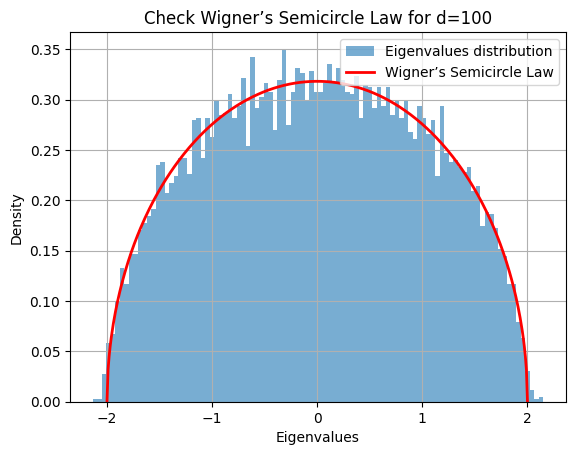

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_wigner_matrix(d, sigma):
    w = np.random.normal(0, sigma, size=(d, d))
    return (w + w.T) / np.sqrt(2)

def wigner_bound(x):
    return np.sqrt(4 - x**2) / (2 * np.pi)

def plot_wigner(d, n = 100):
    eigenvalues = []
    for _ in range(n):
        vals, _ = np.linalg.eigh(generate_wigner_matrix(d, 1.0) / np.sqrt(d))
        eigenvalues.extend(vals)
    plt.hist(eigenvalues, bins=100, density=True, alpha=0.6, label=f'Eigenvalues distribution')
    x = np.linspace(-2, 2, 400)
    
    plt.plot(x, wigner_bound(x), 'r-', lw=2, label='Wigner’s Semicircle Law')
    plt.title(f"Check Wigner’s Semicircle Law for d={d}")
    plt.xlabel("Eigenvalues")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_wigner(100)

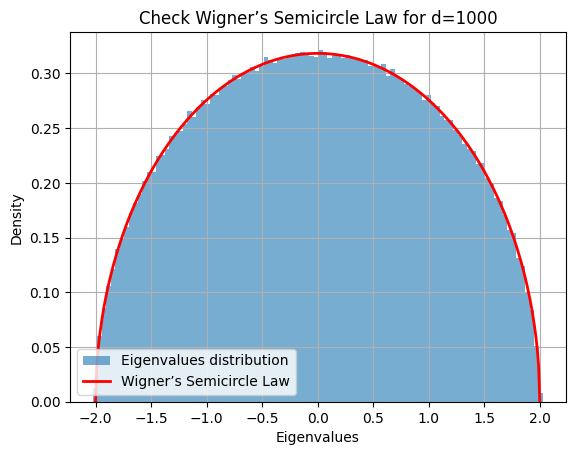

In [10]:
plot_wigner(1000)

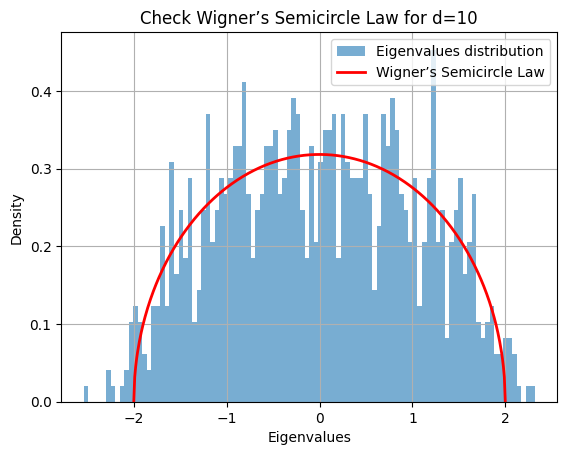

In [11]:
plot_wigner(10)

Results:
Simulated distribution of eigenvalues is close to Wigner's Semicircle Law. The higher the d, the closer the real distribution to theoretical bound.

## Task 2

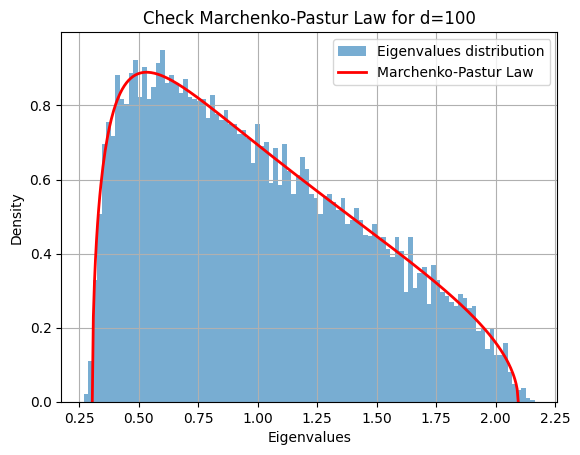

In [16]:
def marchenko_bound(x, r):
    return np.sqrt((x - (1 - np.sqrt(r))**2) * ((1 + np.sqrt(r))**2 - x)) / (2 * np.pi * r * x)

def plot_marchenko(r, d = 100, n = 100):
    N = int(d/r)
    eigenvalues = []
    for _ in range(n):
        x = np.random.multivariate_normal(np.zeros(d), np.eye(d), N)
        vals, _ = np.linalg.eigh((x.T @ x) / N)
        eigenvalues.extend(vals)
    plt.hist(eigenvalues, bins=100, density=True, alpha=0.6, label=f'Eigenvalues distribution')
    x = np.linspace((1 - np.sqrt(r))**2, (1 + np.sqrt(r))**2, 400)
    
    plt.plot(x, marchenko_bound(x, r), 'r-', lw=2, label='Marchenko-Pastur Law')
    plt.title(f"Check Marchenko-Pastur Law for d={d}")
    plt.xlabel("Eigenvalues")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_marchenko(0.2)

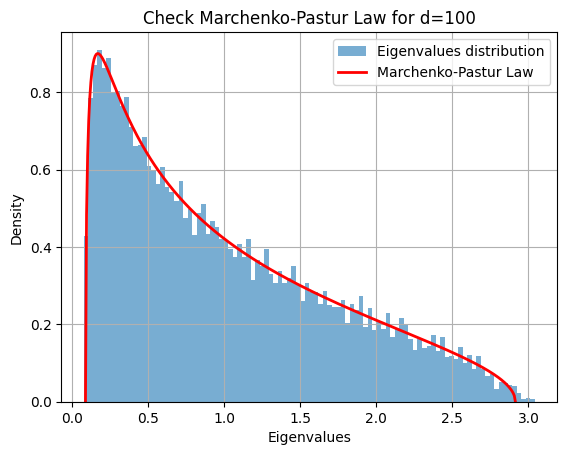

In [19]:
plot_marchenko(0.5)

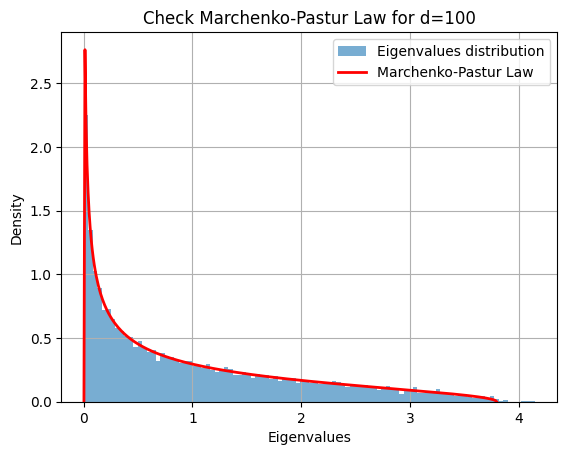

In [20]:
plot_marchenko(0.9)

Results: as we can see, simulations shows that theoretical bound is pretty accurate. Also, as r increases, the sharper graph becomes

## Task 3

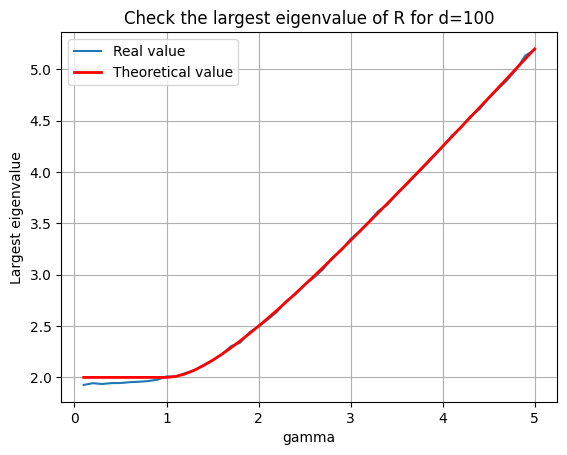

In [38]:
def generate_r(d, gamma):
    s = np.random.randn(d)
    s = s / np.linalg.norm(s)
    return gamma * np.outer(s, s) + generate_wigner_matrix(d, 1.0) / np.sqrt(d)

def plot_r_eig(d, n = 100):
    x = np.linspace(0.1, 5, 50)
    real = []
    theor = []
    for gamma in x:
        eigenvalues = []
        for _ in range(n):
            vals, _ = np.linalg.eigh(generate_r(d, gamma))
            eigenvalues.append(max(vals))
        real.append(sum(eigenvalues)/n)

        if gamma <= 1:
            theor.append(2)
        else:
            theor.append(gamma + 1/gamma)
    
    plt.plot(x, real, label=f'Real value')
    plt.plot(x, theor, 'r-', lw=2, label='Theoretical value')
    plt.title(f"Check the largest eigenvalue of R for d={d}")
    plt.xlabel("gamma")
    plt.ylabel("Largest eigenvalue")
    plt.legend()
    plt.grid(True)
    plt.show()    

plot_r_eig(100)

Results: As we can see, we are pretty close to theoretical value, especially for gamma > 1

## Task 4

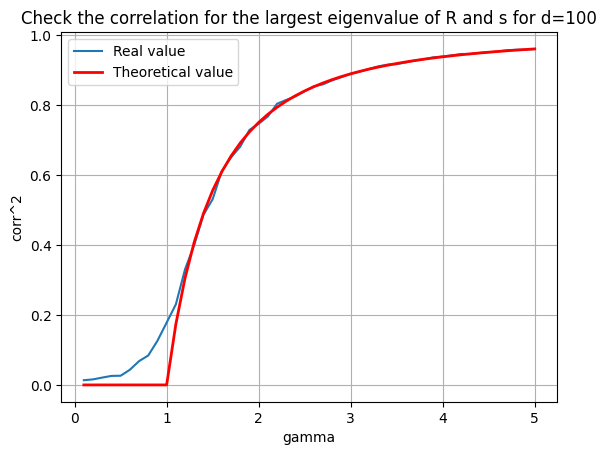

In [39]:
def generate_r_with_s(d, gamma):
    s = np.random.randn(d)
    s = s / np.linalg.norm(s)
    return gamma * np.outer(s, s) + generate_wigner_matrix(d, 1.0) / np.sqrt(d), s

def plot_sv_corr(d, n = 100):
    x = np.linspace(0.1, 5, 50)
    real = []
    theor = []
    for gamma in x:
        corr = []
        for _ in range(n):
            r, s = generate_r_with_s(d, gamma)
            val, vec = np.linalg.eigh(r)
            idx = np.argsort(val)[::-1]
            vec = vec[:, idx]
            corr.append((vec[:, 0] @ s)**2)
        real.append(sum(corr)/n)

        if gamma <= 1:
            theor.append(0)
        else:
            theor.append(1 - 1/(gamma**2))
    
    plt.plot(x, real, label=f'Real value')
    plt.plot(x, theor, 'r-', lw=2, label='Theoretical value')
    plt.title(f"Check the correlation for the largest eigenvalue of R and s for d={d}")
    plt.xlabel("gamma")
    plt.ylabel("corr^2")
    plt.legend()
    plt.grid(True)
    plt.show()    

plot_sv_corr(100)

Results: As we can see, we are pretty close to theoretical value, especially for gamma > 1. As for gamma < 1, our experiments have greater correlation that proposed theoretical one.

## Task 5

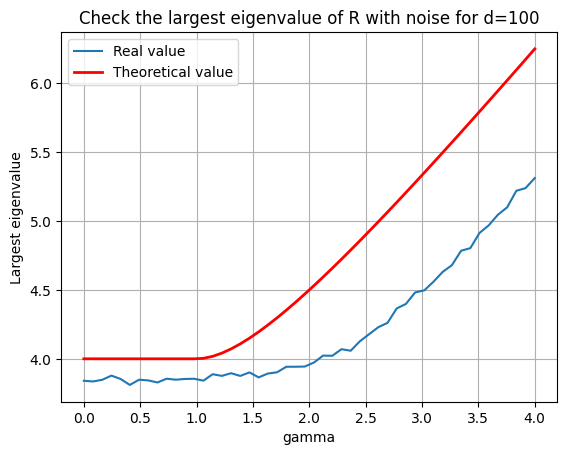

In [45]:
def generate_r_with_noise(d, gamma, N):
    s = np.random.randn(d)
    s = s / np.linalg.norm(s)
    x = np.random.multivariate_normal(np.zeros(d), np.eye(d), N)
    return gamma * np.outer(s, s) + (x.T@x)/N

def plot_r_eig_with_noise(d, n = 100, N = 100):
    r = int(d/N)
    x = np.linspace(np.sqrt(r)-1, np.sqrt(r)+3, 50)
    real = []
    theor = []
    for gamma in x:
        eigenvalues = []
        for _ in range(n):
            vals, _ = np.linalg.eigh(generate_r_with_noise(d, gamma, N))
            eigenvalues.append(max(vals))
        real.append(sum(eigenvalues)/n)

        if gamma <= np.sqrt(r):
            theor.append((1 + np.sqrt(r))**2)
        else:
            theor.append((1 + gamma) * (1 + r/gamma))
    
    plt.plot(x, real, label=f'Real value')
    plt.plot(x, theor, 'r-', lw=2, label='Theoretical value')
    plt.title(f"Check the largest eigenvalue of R with noise for d={d}")
    plt.xlabel("gamma")
    plt.ylabel("Largest eigenvalue")
    plt.legend()
    plt.grid(True)
    plt.show()    

plot_r_eig_with_noise(100)

Results: As we can see, achieved from simulations results are nor exceeding the theoretical bound, which is pretty good 

## Task 6

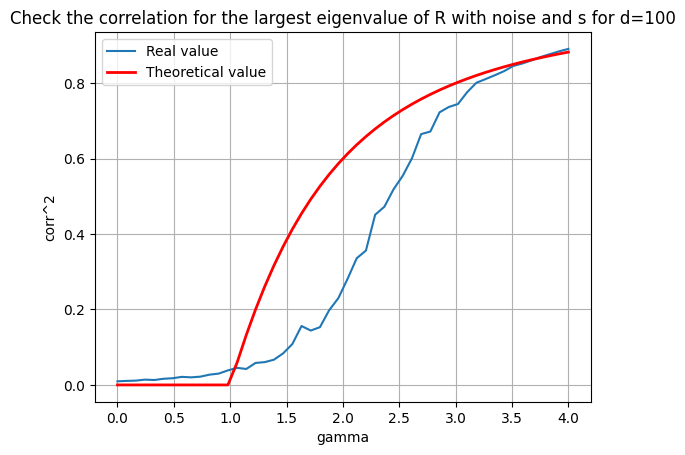

In [49]:
def generate_r_s_with_noise(d, gamma, N):
    s = np.random.randn(d)
    s = s / np.linalg.norm(s)
    x = np.random.multivariate_normal(np.zeros(d), np.eye(d), N)
    return gamma * np.outer(s, s) + (x.T@x)/N, s

def plot_sv_corr(d, n = 100, N = 100):
    r = int(d/N)
    x = np.linspace(np.sqrt(r)-1, np.sqrt(r)+3, 50)
    real = []
    theor = []
    for gamma in x:
        corr = []
        for _ in range(n):
            R, s = generate_r_s_with_noise(d, gamma, N)
            val, vec = np.linalg.eigh(R)
            idx = np.argsort(val)[::-1]
            vec = vec[:, idx]
            corr.append((vec[:, 0] @ s)**2)
        real.append(sum(corr)/n)

        if gamma <= np.sqrt(r):
            theor.append(0)
        else:
            theor.append((1 - r/gamma**2) / (1 + r/gamma**2))
    
    plt.plot(x, real, label=f'Real value')
    plt.plot(x, theor, 'r-', lw=2, label='Theoretical value')
    plt.title(f"Check the correlation for the largest eigenvalue of R with noise and s for d={d}")
    plt.xlabel("gamma")
    plt.ylabel("corr^2")
    plt.legend()
    plt.grid(True)
    plt.show()    

plot_sv_corr(100)

Results: As we can see, achieved from simulations results is generally close or lower than theoretical bound. However, for $\gamma \leq \sqrt{r}$ simulations results have greater correlation, than theoretical proposal